# Tuning a Random Forest Trading Model

---

### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read in X-Test CSV as Pandas DataFrame

In [2]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/x_test.csv')
x_test=pd.read_csv(csv_path)
x_test.set_index(pd.to_datetime(x_test['date'], infer_datetime_format=True), inplace=True)
x_test.drop(columns=['date'], inplace=True)
x_test.head()

crossover_signal  vol_trend_signal  bollinger_signal
date                                                                     
2020-01-08 00:00:00               1.0              -1.0              -1.0
2020-01-08 01:00:00               1.0              -1.0              -1.0
2020-01-08 02:00:00               1.0              -1.0              -1.0
2020-01-08 03:00:00               1.0              -1.0              -1.0
2020-01-08 04:00:00               1.0              -1.0              -1.0

### Read in Y-Test CSV (Actual Results) as Pandas DataFrame

In [3]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/y_test.csv')
y_test = pd.read_csv(csv_path)
y_test.set_index(pd.to_datetime(y_test['date'], infer_datetime_format=True), inplace=True)
y_test.drop(columns=['date'], inplace=True)
y_test.rename(columns={'Positive Return': 'Actual Value'}, inplace=True)
y_test.head()

hourly_return  Actual Value
date                                            
2020-01-08 00:00:00       0.034975             1
2020-01-08 01:00:00      -0.007708             0
2020-01-08 02:00:00      -0.011300             0
2020-01-08 03:00:00       0.001738             1
2020-01-08 04:00:00       0.005783             1

### Load Model and Predict Y-Values from X-Test Values

In [4]:
# Load the model and make the predictions from the x test dataset
model = load('../Resources/random_forest_model.joblib')
predictions = model.predict(x_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

### Compare Predicted Results to Y-Test (Actual Results)

In [5]:
# Add predicted results to DataFrame
y_test["Predicted Value"] = predictions
y_test

hourly_return  Actual Value  Predicted Value
date                                                             
2020-01-08 00:00:00       0.034975             1              1.0
2020-01-08 01:00:00      -0.007708             0              1.0
2020-01-08 02:00:00      -0.011300             0              1.0
2020-01-08 03:00:00       0.001738             1              1.0
2020-01-08 04:00:00       0.005783             1              1.0
...                            ...           ...              ...
2020-01-15 13:00:00       0.013478             1              1.0
2020-01-15 14:00:00      -0.003956             0              1.0
2020-01-15 15:00:00      -0.010692             0              1.0
2020-01-15 16:00:00       0.003385             1              1.0
2020-01-15 17:00:00      -0.001083             0              1.0

[186 rows x 3 columns]

### Plot Predicted Results vs. Actual Results

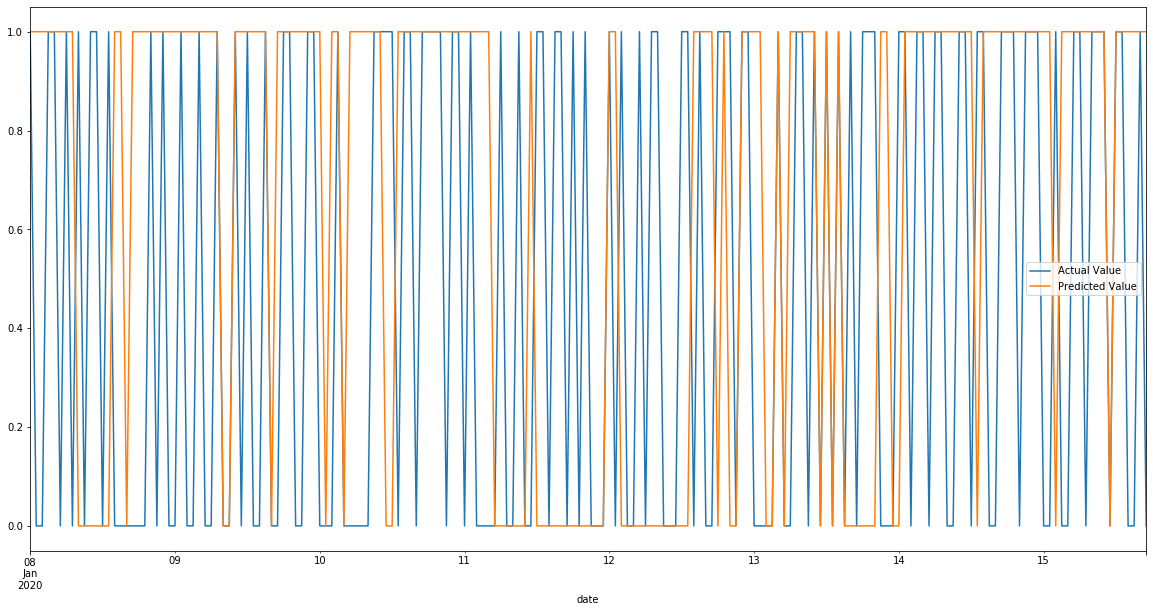

In [6]:
# Plot predicted results vs. actual results
y_test[['Actual Value', 'Predicted Value']].plot(figsize=(20,10))

### Plot Predicted Results vs. Actual Results (of last 10 records)

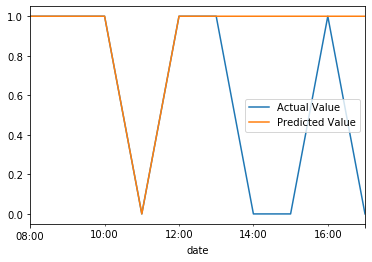

In [7]:
# Plot last 10 records of predicted vs. actual results
y_test[['Actual Value', 'Predicted Value']].tail(10).plot()

---

### Generate Model Accuracy Score

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
# Generate an accuracy score using the `accuracy_score` function from the sklearn metrics class
accuracy_score(y_test['Actual Value'], y_test['Predicted Value'])

0.510752688172043

In [10]:
# Generate an accuracy score using the `score` function from the model class
model.score(x_test, y_test['Actual Value'])

0.510752688172043

### Generate Classification Report 

In [11]:
# Generate a classification report using the `classification_report` function from the sklearn metrics class
print(classification_report(y_test['Actual Value'], y_test['Predicted Value']))

              precision    recall  f1-score   support

           0       0.54      0.35      0.43        96
           1       0.50      0.68      0.57        90

    accuracy                           0.51       186
   macro avg       0.52      0.52      0.50       186
weighted avg       0.52      0.51      0.50       186



### Generate Confusion Matrix

In [12]:
# Generate a confusion matrix using the `confusion_matrix` function from the sklearn metrics class
c_matrix = confusion_matrix(y_test['Actual Value'], y_test['Predicted Value'])

# Import results to DataFrame
df = pd.DataFrame(c_matrix)
df.columns = ['Predicted 0', 'Predicted 1']
df.index = ['Actual 0', 'Actual 1']
df

Predicted 0  Predicted 1
Actual 0           34           62
Actual 1           29           61

### Calculate True Positive Rate (TPR) and False Positive Rate (FPR)

In [13]:
true_negatives = c_matrix[0][0]
false_positives = c_matrix[0][1]
false_negatives = c_matrix[1][0]
true_positives = c_matrix[1][1]

true_positive_rate = true_positives / (true_positives + false_negatives)
false_positive_rate = false_positives / (false_positives + true_negatives)

print(true_positive_rate, false_positive_rate)

0.6777777777777778 0.6458333333333334


### Plot ROC Curve Method 1

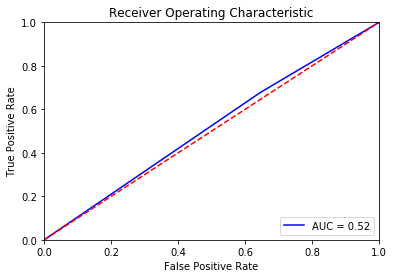

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test['Actual Value'], y_test['Predicted Value'])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Plot ROC Curve Method 2

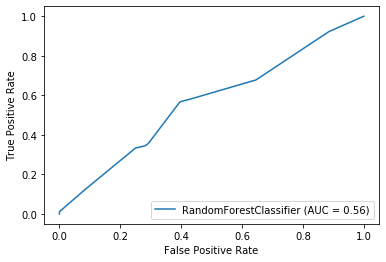

In [15]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test['Actual Value'])

### HyperParameter Tuning using GridSearch

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from pprint import pprint

### Read in X-Train CSV as DataFrame

In [17]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/x_train.csv')
x_train=pd.read_csv(csv_path)
x_train.set_index(pd.to_datetime(x_train['date'], infer_datetime_format=True), inplace=True)
x_train.drop(columns=['date'], inplace=True)
x_train.head()

crossover_signal  vol_trend_signal  bollinger_signal
date                                                                     
2019-12-16 19:00:00               0.0               0.0               0.0
2019-12-16 20:00:00              -1.0               0.0               0.0
2019-12-16 21:00:00              -1.0              -1.0               0.0
2019-12-16 22:00:00              -1.0              -1.0               0.0
2019-12-16 23:00:00              -1.0               1.0               0.0

### Read in Y-Train CSV as DataFrame

In [18]:
# Set path to CSV and read in CSV
csv_path = Path('../Resources/y_train.csv')
y_train=pd.read_csv(csv_path)
y_train.set_index(pd.to_datetime(y_train['date'], infer_datetime_format=True), inplace=True)
y_train.drop(columns=['date'], inplace=True)
y_train.head()

Positive Return
date                                
2019-12-16 19:00:00                0
2019-12-16 20:00:00                0
2019-12-16 21:00:00                1
2019-12-16 22:00:00                1
2019-12-16 23:00:00                0

### Display Available Model Parameters

In [19]:
rf = RandomForestClassifier()
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### Determine Optimal Hyperparameters using GridSearch

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'random_state' : [1, 2, 3, 4, 5]
}

#tscv = TimeSeriesSplit(n_splits=2)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

### Output Optimal Hyperparameters

In [21]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 200, 'random_state': 3}

### Output Model with Optimal Hyperparameters

In [22]:
best_model = grid_search.best_estimator_

### Re-run Tuned Model

In [23]:
best_results = y_test.copy()

best_results['Predicted Value'] = best_model.predict(x_test)

### Generate Tuned Model Accuracy

In [24]:
best_model.score(x_test, best_results['Actual Value'])

0.5053763440860215

### Generate Tuned Model Classification Report

In [25]:
print(classification_report(best_results['Actual Value'], best_results['Predicted Value']))

              precision    recall  f1-score   support

           0       0.61      0.11      0.19        96
           1       0.49      0.92      0.64        90

    accuracy                           0.51       186
   macro avg       0.55      0.52      0.42       186
weighted avg       0.55      0.51      0.41       186



### Generate Tuned Model Confusion Matrix

In [26]:
# Generate a confusion matrix using the `confusion_matrix` function from the sklearn metrics class
c_matrix = confusion_matrix(best_results['Actual Value'], best_results['Predicted Value'])

# Import results to DataFrame
df = pd.DataFrame(c_matrix)
df.columns = ['Predicted 0', 'Predicted 1']
df.index = ['Actual 0', 'Actual 1']
df

Predicted 0  Predicted 1
Actual 0           11           85
Actual 1            7           83

### Plot Tuned Model ROC Curve

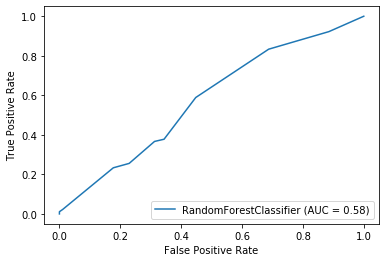

In [27]:
plot_roc_curve(best_model, x_test, best_results['Actual Value'])